# Alta Ski Resort Visualization
I used the example from the pandas Cookbook

In [19]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('alta-noaa-1980-2019.csv')
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,0.10,2.0,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,0.43,3.0,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,0.09,1.0,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,0.00,0.0,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,0.00,0.0,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


## 2018 - 2019 Report

### Create DataFrame

In [16]:
alta = (df
        .assign(DATE = pd.to_datetime(df.DATE))     ## Create the date column
        .fillna(method="backfill")                  ## Replaces missing values using backfill
        .set_index('DATE')                          ## Make the date column the index
        .loc['2018-09':'2019-08','SNWD']            ## Specify 2018-2019 ski season
)

display(alta.dtypes)

display(alta.head(10), 
        alta.tail(10))

display(f'Total Missing:{alta.isnull().sum()}')

dtype('float64')

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
2018-09-04    0.0
2018-09-05    0.0
2018-09-06    0.0
2018-09-07    0.0
2018-09-08    0.0
2018-09-09    0.0
2018-09-10    0.0
Name: SNWD, dtype: float64

DATE
2019-08-22    0.0
2019-08-23    0.0
2019-08-24    0.0
2019-08-25    0.0
2019-08-26    0.0
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, dtype: float64

'Total Missing:0'

### Default Visualization

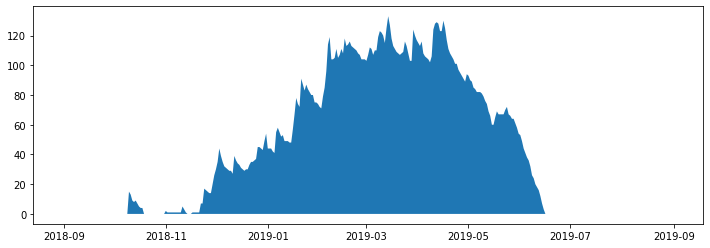

In [17]:
fig, ax = plt.subplots(figsize=(12,4))
ax.fill_between(alta.index, alta)

### Final Visualization

Text(0, 0.5, 'Snow Depth (in)')

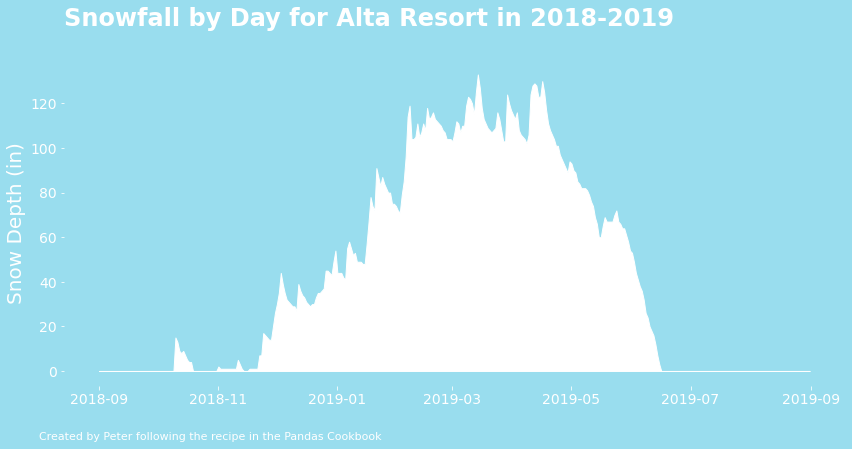

In [42]:
## COLORS
blue = '#99ddee'
white = '#ffffff'

## CREATE PLOT
fig, ax = plt.subplots(figsize=(14,6), linewidth=5, facecolor=blue)
ax.fill_between(alta.index, alta, color = white)

## FONT SIZE
plt.rcParams['axes.labelsize'] = 20

tickLabelSize = 14
plt.rcParams['xtick.labelsize'] = tickLabelSize
plt.rcParams['ytick.labelsize'] = tickLabelSize


## SET APPEARANCE OPTIONS

# background color
ax.set_facecolor(blue)

# remove graph borders
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# title
ax.set_title('Snowfall by Day for Alta Resort in 2018-2019\n', 
             color = white, 
             fontweight = 'bold', 
             fontsize = 24, 
             loc = 'left')

# footnote
fig.text(.1,0,'Created by Peter following the recipe in the Pandas Cookbook', fontdict={'fontsize':11,'color':white})

# set x and y value colors
ax.tick_params(axis='x', colors = white)
ax.tick_params(axis='y', colors = white)

# add a Y label
ax.set_ylabel('Snow Depth (in)', color = white)